<a href="https://colab.research.google.com/github/jrahemtulla/PS2HouseDataExercise/blob/master/Assignment_2_Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
url = "https://raw.githubusercontent.com/jrahemtulla/PS2HouseDataExercise/master/train.csv"
data = pd.read_csv(url)
train = data
train.shape
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
train['SalePrice'].head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

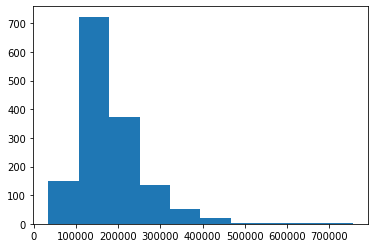

In [53]:
plt.hist(train['SalePrice'])

In [54]:
numeric = train.select_dtypes(include = [np.number]
                                  )
numeric.shape



(1460, 38)

In [55]:
corr = numeric.corr()
cols1 = corr['SalePrice'].sort_values(ascending = False)[0:11]
cols1


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [56]:

cols = corr['SalePrice'].sort_values(ascending = False)[0:11].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [57]:
X = train[cols]
Y= train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


In [58]:
from sklearn import linear_model 
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)

In [59]:
model.score(X,Y)


0.7736928402773303

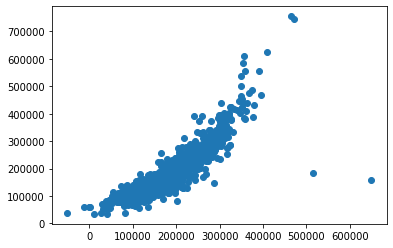

In [60]:
plt.scatter(predictions,Y)

In [61]:
print(lr.intercept_)

-1186193.7666661234


In [62]:
print(lr.coef_)

[ 1.96045898e+04  5.12971178e+01  1.04179010e+04  1.49475334e+01
  1.98650991e+01  1.41737355e+01 -6.79087146e+03  3.31050771e+01
  2.68240707e+02  2.96481161e+02]


In [76]:
url2 = "https://raw.githubusercontent.com/jrahemtulla/PS2HouseDataExercise/master/test.csv"
test = pd.read_csv(url2)
test.shape
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1952,1952,Flat,Tar&Grv,BrkComm,Brk Cmn,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasW,Fa,N,FuseF,944,0,0,944,0,0,1,0,2,1,Fa,4,Min1,0,NaN,Detchd,1956.0,Unf,2,528,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,691,691,GasA,Ex,Y,FuseA,691,0,0,691,0,0,1,0,2,1,Ex,4,Typ,0,NaN,Detchd,1920.0,Unf,1,216,Fa,TA,N,0,20,94,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,53.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1550,1574,GasA,Ex,Y,SBrkr,1574,0,0,1574,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,824,TA,TA,Y,144,104,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1680,1680,GasA,Fa,Y,SBrkr,1680,0,0,1680,0,0,2,0,4,2,TA,8,Typ,0,NaN,Detchd,1976.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,1,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,457,TA,TA,Y,156,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [78]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [86]:
cols2 =cols.drop('SalePrice')
cols2

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

# test

In [103]:
X = test[cols2]
predictions = model.predict(X)
predictions



array([ 58831.22246844,  70944.86328259, 268014.27044789, 186495.19024964,
       223125.59188626, 114277.8073552 , 200057.92536513,  87428.98276394,
       244668.88248139, 105634.39853736, 103938.46456322, 117134.24987667,
       147349.79202945, 114068.24361728, 131818.39611478, 228977.55320764,
       221166.09270216, 226949.62574089, 183695.67594604, 222990.68087377,
       142044.02887703, 204462.65394895, 108951.49569393, 222826.64121913,
       324881.99468537, 121828.28424359, 147762.5211267 , 274502.00045689,
       117597.13212484, 138224.19539159, 129972.60271553, 266202.11878147,
       301046.01120831, 254080.57685576,  97932.98399564,  60835.49823459,
       293687.79491834, 273957.55043942, 100501.02636131,  66489.66122724,
       185063.04404504, 184216.55960136, 191896.71595442, 260589.19189304,
       320398.48328746, 104387.42762488, 359684.53804644, 146918.85889411,
       167636.30500618,  78279.61055758, 209512.37445862, 210766.86792585,
       200710.92339624, 1

In [104]:
results = pd.DataFrame(predictions, test.Id)
results.columns = ["SalePrice"]
results

,SalePrice
Id,
1001,58831.222468
1002,70944.863283
1003,268014.270448
1004,186495.190250
1005,223125.591886
...,...
1456,191896.289130
1457,232731.061015
1458,227093.912279


In [113]:
results.to_csv("predictions.csv", index= False, header= True)